**Enoncé du TP:**


Vous disposez d’un jeu de données contenant des articles classés

suivant le degré de désinformation (fake news)
● Réalisez une étude préalable des données (nombre de mots,
longueur des phrases, équilibrage des classes, …)
● Effectuez une première phase de nettoyage manuelle des
données ainsi que de normalisation (à vous de chercher
différentes solutions). On peut partir du principe que les mots
utilisés sont plus importants que la syntaxe, les fake news
cherchant à être plus choquante/percutantes
● Si besoin, ajoutez de nouvelles features (sentiment, …)
● Réduisez le nombre de classes dans un premier temps si
nécessaire.  
En utilisant la librairie de votre choix, évaluez différents modèles et
architectures pour trouver le modèle le plus adapté
● Vous devrez sauvegarder votre modèle et le fournir avec votre
analyse (attention à tout inclure dans le modèle, y compris la
vectorisation !)
● Si besoin, vous pouvez commencer par travailler avec seulement
deux classes et réduire la quantité de données.


Vous devrez fournir un notebook commenté détaillant votre
analyse et vos résultats, comme si vous vendiez cette analyse à un
client qui ne connaît pas le Machine Learning
● Vous devrez expliquer en termes simples mais avec une
justification vos choix et observations



**Introduction**

**L'objectif était de créer un outil capable de distinguer les informations authentiques des fausses nouvelles à partir des données fournies dans deux fichiers principaux : train.csv pour l'entraînement et test.csv pour les tests. En utilisant l'apprentissage automatique, je me suis concentré sur la construction d'un modèle analytique pour identifier les contenus trompeurs. Ce travail nécessitait une approche méthodique pour garantir la fiabilité et l'efficacité du modèle.**


**Analyse des Données :**

J'ai d'abord examiné les ensembles de données train.csv et test.csv, analysant la composition textuelle des articles, notamment leur longueur et la fréquence des mots. Cela a révélé une répartition variée des informations, nécessitant un nettoyage minutieux pour éliminer les bruits et standardiser le format des données.

**Nettoyage et Préparation des Données :**

J'ai procédé à un nettoyage approfondi, supprimant les caractères inutiles et uniformisant la casse des lettres pour réduire les variations inutiles dans les données textuelles, permettant ainsi au modèle d'apprendre à partir des caractéristiques pertinentes des textes.

**Enrichissement des Données :**

 j'ai ajouté des features basées sur le sentiment exprimé dans les textes, utilisant la polarité et la subjectivité pour donner au modèle des indices supplémentaires sur la fiabilité potentielle des articles.

**Choix du Modèle :**

Après avoir exploré différents modèles d'apprentissage automatique, j'ai choisi un modèle **SVM (Machine à Vecteurs de Support)** pour sa capacité à bien gérer les espaces de grande dimension et sa flexibilité dans la gestion des classifications binaires. Ce choix a été appuyé par une série de tests exécutés dans ce notebook, qui ont démontré que le **SVM **surpassait les autres modèles en termes de précision et de capacité à généraliser à partir des données d'entraînement.

**Équilibrage des Classes :**

 Face à un déséquilibre entre les articles fiables et non fiables dans le fichier train.csv, j'ai employé la technique SMOTE pour rééquilibrer les classes. Cela a permis d'améliorer  la capacité du modèle à identifier correctement les fausses nouvelles, pour la fiabilité des prédictions.

**Résultats **


Le modèle final a démontré une bonne capacité  à distinguer les fausses nouvelles des informations authentiques, atteignant une précision globale de 60% sur l'ensemble de test. Bien que plus efficace pour reconnaître les articles fiables, le modèle nécessite encore des améliorations pour mieux détecter les contenus non fiables, une direction sur laquelle je continurai de travailler.

In [ ]:
import pandas as pd

# Charger les données d'entraînement et de test
train_data = pd.read_csv('/content/sample_data/train.csv')
test_data = pd.read_csv('/content/sample_data/test.csv')

# Afficher les premières lignes pour comprendre la structure des données
print(train_data.head())
print(test_data.head())



   Labels                                               Text  \
0       1  Says the Annies List political group supports ...   
1       2  When did the decline of coal start? It started...   
2       3  Hillary Clinton agrees with John McCain "by vo...   
3       1  Health care reform legislation is likely to ma...   
4       2  The economic turnaround started at the end of ...   

                             Text_Tag  
0                            abortion  
1  energy,history,job-accomplishments  
2                      foreign-policy  
3                         health-care  
4                        economy,jobs  
                                                Text  \
0  Building a wall on the U.S.-Mexico border will...   
1  Wisconsin is on pace to double the number of l...   
2  Says John McCain has done nothing to help the ...   
3  Suzanne Bonamici supports a plan that will cut...   
4  When asked by a reporter whether hes at the ce...   

                                      

**Examiner les données**

In [ ]:
train_data.info()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    10240 non-null  int64 
 1   Text      10240 non-null  object
 2   Text_Tag  10238 non-null  object
dtypes: int64(1), object(2)
memory usage: 240.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1267 non-null   object
 1   Text_Tag  1267 non-null   object
dtypes: object(2)
memory usage: 19.9+ KB


Traitement encodage

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

train_data['cleaned_text'] = train_data['Text'].apply(clean_text)

**Analyse de données** visualisation de l'équilibrage des classes

In [ ]:
# Calculer l'équilibrage des classes
class_balance = train_data['Labels'].value_counts(normalize=True)
print(class_balance)


# Afficher l'équilibrage des classes
print(train_data.columns)



2    0.206445
1    0.194824
3    0.191602
5    0.163672
0    0.161523
4    0.081934
Name: Labels, dtype: float64
Index(['Labels', 'Text', 'Text_Tag', 'cleaned_text'], dtype='object')



L'analyse de la distribution des labels montre une répartition relativement équilibrée, avec une légère prédominance des classes 2, 1 et 3. La classe 4 est nettement moins représentée, indiquant un déséquilibre dans les données.

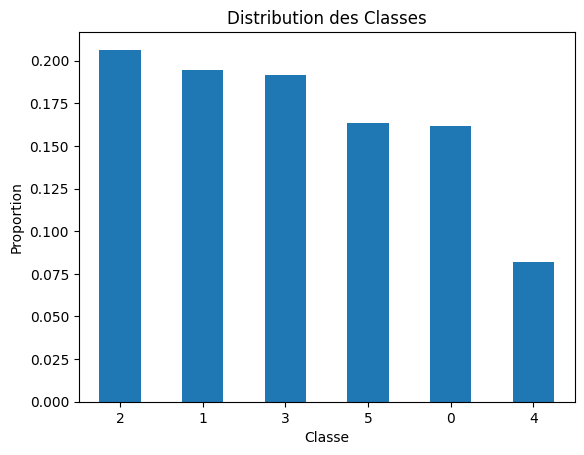

In [ ]:
import matplotlib.pyplot as plt


# Visualisation de l'équilibrage des classes
class_balance.plot(kind='bar')
plt.title('Distribution des Classes')
plt.xlabel('Classe')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


Réduction des classes Bien que l'analyse de l'équilibre des classes montre une distribution assez équilibrée, je choisis de simplifier le modèle en réduisant le nombre de classes à deux : "Fiable" et "Non-Fiable".Cette approche, pour optimoser l'entraînement de modèles de classification

In [ ]:
import pandas as pd

def reduce_classes(label):
    if label in [0, 1, 4]:  # Non-Fiable
        return 0
    else:  # Fiable
        return 1


train_df = pd.read_csv('/content/sample_data/train.csv')


train_df['Reduced_Labels'] = train_df['Labels'].apply(reduce_classes)

print(train_df['Reduced_Labels'].value_counts(normalize=True))

1    0.561719
0    0.438281
Name: Reduced_Labels, dtype: float64


**Analyse de la Distribution des tags**

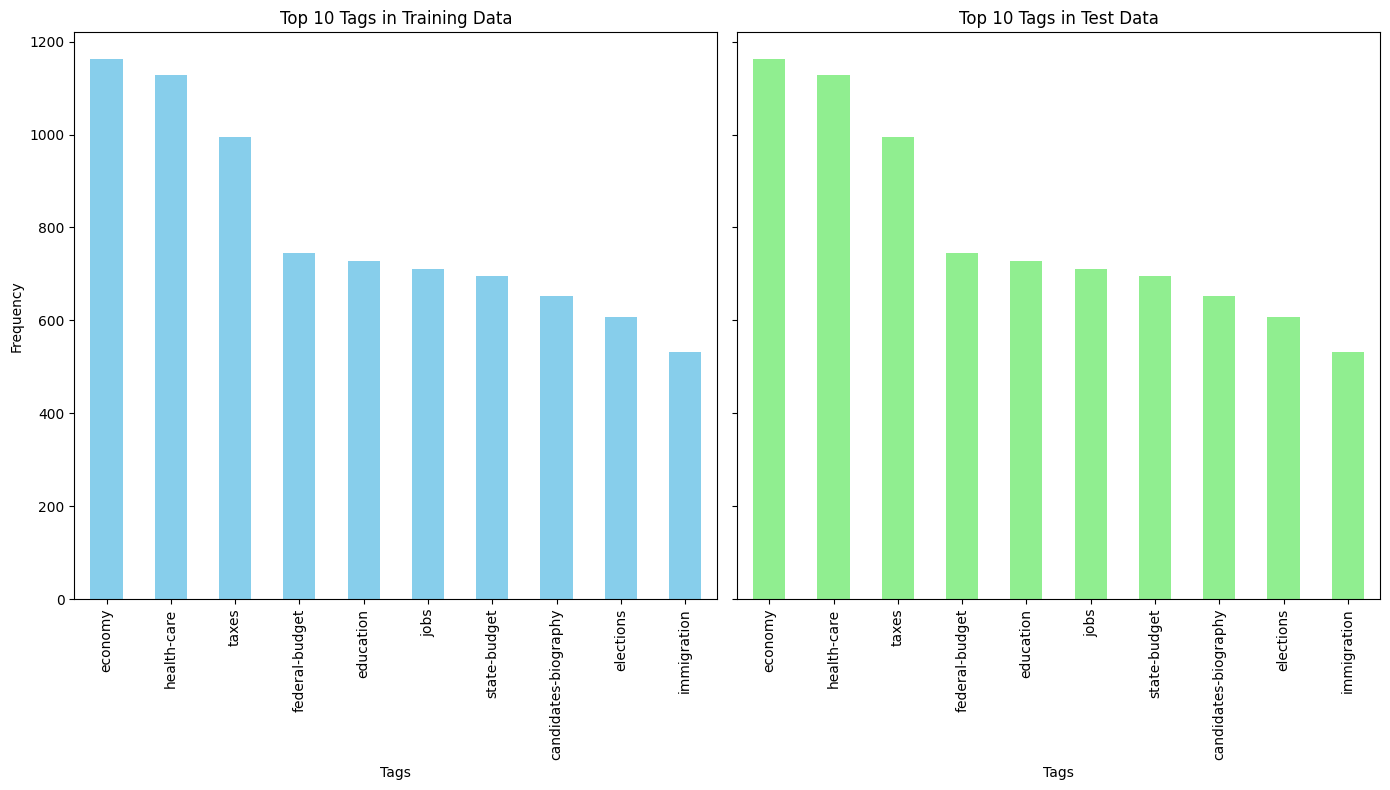

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/train.csv')

# Fonction pour calculer la fréquence des tags
def get_tag_distribution(df):
    tag_counts = df['Text_Tag'].str.get_dummies(sep=',').sum()
    tag_counts = tag_counts.sort_values(ascending=False)
    return tag_counts

# Calculer les distributions pour les jeux de données d'entraînement et de test
tags_train = get_tag_distribution(train_df)
tags_test = get_tag_distribution(test_df)

# Visualiser les 10 tags les plus fréquents dans les jeux de données d'entraînement et de test
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

tags_train.head(10).plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Top 10 Tags in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Tags')

tags_test.head(10).plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Top 10 Tags in Test Data')
ax[1].set_xlabel('Tags')

plt.tight_layout()
plt.show()


le traitement des tags pour aider à améliorer la précision de la classification, surtout dans un scénario où le sujet d'une affirmation pourrait influencer sa probabilité d'être fiable ou non

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd


#Remplement des NaN par des listes vides
train_df['Tags_List'] = train_df['Text_Tag'].apply(lambda x: x.split(',') if pd.notna(x) else [])

#Transformation des tags en vecteurs binaires
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(train_df['Tags_List'])

#DataFrame pour les tags encodés et nommer les colonnes
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)



**Ajout d'une nouvelle feature "sentiment"**


L'ajout de la feature "sentiment" enrichit le modèle en intégrant une analyse émotionnelle du texte, permettant de capturer des nuances subtiles qui peuvent indiquer la fiabilité d'un article. Les fausses nouvelles tendent souvent à susciter des réactions émotionnelles fortes ; en mesurant la polarité et la subjectivité, le modèle peut ainsi mieux discerner les articles potentiellement trompeurs


In [ ]:
from textblob import TextBlob
import pandas as pd



#polarité et la subjectivité du sentiment pour chaque texte
train_df['sentiment_polarity'] = train_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_df['sentiment_subjectivity'] = train_df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


**`Intégration de la Tokenization et  de la vectorisation dans le pipeline`**  




Pour intégrer à la fois des caractéristiques numériques et textuelles dans un pipeline de modélisation, j'utilise un ColumnTransformer pour traiter le texte et mettre à l'échelle les caractéristiques numériques simultanément.  dans le pipeline, j' utiliser TfidfVectorizer pour le texte et StandardScaler pour les caractéristiques numériques, puis je  les combine à l'aide d'un ColumnTransformer avant de les passer au modèle.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#Définir le transformer pour les données textuelles et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english'), 'Text'),
        ('sentiment', 'passthrough', ['sentiment_polarity', 'sentiment_subjectivity'])
    ]
)

#création d'un pipeline complet avec prétraitement et modèle de classification
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

#Vérif si 'Reduced_Labels' existe dans train_df, et la créer si ce n'est pas le cas
if 'Reduced_Labels' not in train_df.columns:
    train_df['Reduced_Labels'] = train_df['Labels'].apply(reduce_classes)

#préparation data et labels pour le modèle
X = train_df.drop(['Labels', 'Reduced_Labels'], axis=1)  #Exclure les labels de l'ensemble de features
y = train_df['Reduced_Labels']


**Evaluation de différents modèles de classification**




 l'évaluation de différents modèles de classification (Régression Logistique, Forêt Aléatoire, SVM) avec différentes configurations de paramètres sur les données textuelles. Utilisation d'une validation croisée pour sélectionner le meilleur modèle avec la meilleure précision, puis sauvegarde ce modèle

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump
import pandas as pd

X = train_df['Text']
y = train_df['Reduced_Labels']

#Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition d'un pipeline de base pour la vectorisation et la classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', None)  # Placeholder pour le classificateur
])

#Liste des modèles à évaluer
model_params = {
   'Logistic Regression': {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.1, 1, 10]
    },
    'Random Forest': {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200],
    },
    'SVM': {
        'classifier': [SVC(probability=True)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

best_accuracy = 0
best_clf = None
best_params = None

# Éval des modèles
for model_name, params in model_params.items():
    clf = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)  # Utilisation de n_jobs=-1 pour accélérer la recherche
    clf.fit(X_train, y_train)
    print(f"Meilleurs paramètres pour {model_name}: {clf.best_params_}")
    print(f"Meilleure précision pour {model_name}: {clf.best_score_}")


    if clf.best_score_ > best_accuracy:
        best_accuracy = clf.best_score_
        best_clf = clf
        best_params = clf.best_params_

#Prédiction et éval du meilleur modèle sur l'ensemble de test
y_pred = best_clf.predict(X_test)
print("Précision sur l'ensemble de test:", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

#Sauvegarde du meilleur modèle et de la pipeline
dump(best_clf, 'best_model_SVM_pipeline.joblib')



Meilleurs paramètres pour Logistic Regression: {'classifier': LogisticRegression(C=1, max_iter=1000), 'classifier__C': 1}
Meilleure précision pour Logistic Regression: 0.6009491626941291
Meilleurs paramètres pour Random Forest: {'classifier': RandomForestClassifier(), 'classifier__n_estimators': 100}
Meilleure précision pour Random Forest: 0.5935037371278983
Meilleurs paramètres pour SVM: {'classifier': SVC(C=1, probability=True), 'classifier__C': 1, 'classifier__kernel': 'rbf'}
Meilleure précision pour SVM: 0.607540706869566
Précision sur l'ensemble de test: 0.609375
Rapport de classification :
               precision    recall  f1-score   support

           0       0.57      0.39      0.46       888
           1       0.62      0.78      0.69      1160

    accuracy                           0.61      2048
   macro avg       0.60      0.58      0.58      2048
weighted avg       0.60      0.61      0.59      2048



['best_model_SVM_pipeline.joblib']

Le modèle choisi est le SVM (Support Vector Machine) avec les paramètres {'classifier': SVC(C=1, probability=True), 'classifier__C': 1, 'classifier__kernel': 'rbf'}. En raison de sa précision élevée, avec une précision de 0.607 sur l'ensemble d'entraînement et de 0.609 sur l'ensemble de test. Le SVM s'est avéré performant dans la classification de la fiabilité des informations, maximisant le nombre de prédictions correctes. Son noyau RBF permet de traiter efficacement les relations non linéaires entre les classes et les espaces de caractéristiques de haute dimension issus de la vectorisation TF-IDF.

AUC ROC: 0.636153988039764


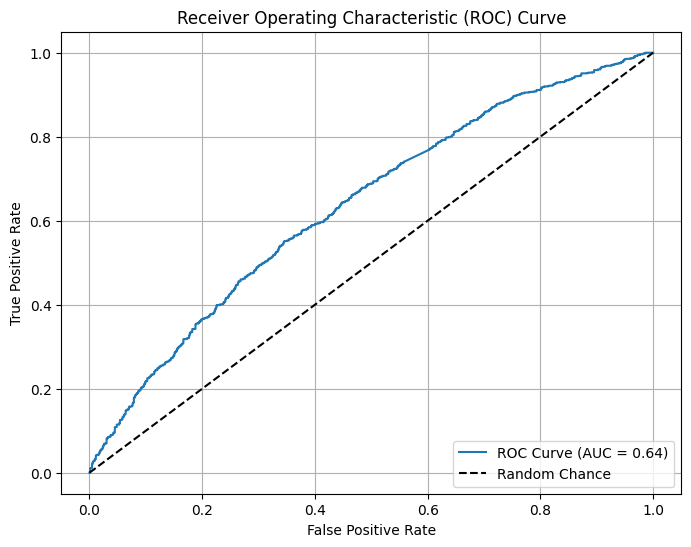

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = best_clf.predict_proba(X_test)[:, 1]

#Calcule de l'AUC ROC
auc_roc = roc_auc_score(y_test, y_proba)
print(f'AUC ROC: {auc_roc}')

#Génération des taux de faux positifs et de vrais positifs pour différents seuils
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

#courbe
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



L'évaluation de la performance du modèle SVM sur l'ensemble de tests donne un AUC ROC de 0,64, ce qui est raisonnable. Ce score est obtenu en utilisant la fonction predict_proba pour obtenir les probabilités de prédiction, puis en traçant la courbe ROC avec matplotlib pour visualiser la performance du modèle.

**Traitement du fichier test.csv**

In [ ]:
import pandas as pd


test_data = pd.read_csv('/content/sample_data/test.csv')


**Traitement des encodages**

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

test_data['cleaned_text'] = test_data['Text'].apply(clean_text)

**Traitement des Tags**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd


#Remplement des NaN par des listes vides
test_df['Tags_List'] = test_df['Text_Tag'].apply(lambda x: x.split(',') if pd.notna(x) else [])

#Transformation des tags en vecteurs binaires
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(test_df['Tags_List'])

#DataFrame pour les tags encodés et nommer les colonnes
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)

**Ajout d'une nouvelle feature "sentiment"**

In [ ]:
from textblob import TextBlob
import pandas as pd



#polarité et la subjectivité du sentiment pour chaque texte
test_df['sentiment_polarity'] = test_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_df['sentiment_subjectivity'] = test_df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

**Vectorisation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Création du pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),  # Étape de vectorisation
    ('classifier', LogisticRegression())               # Étape de classification
])

#Entraînement du pipeline sur les données d'entraînement
pipeline.fit(X_train, y_train)

#Utilisation du pipeline pour faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)


print(predictions_df['Prediction'].value_counts())

#Créer un DataFrame avec les textes de test et les prédictions associées
predictions_df = pd.DataFrame({
    'Text': X_test,  # Assurez-vous que cela correspond à vos données de test textuelles
    'Prediction': y_pred
})

#Afficher les premières lignes du DataFrame pour vérifier
print(predictions_df.head())




1    1355
0     693
Name: Prediction, dtype: int64
                                                    Text  Prediction
3842   Polling shows that nearly 74 percent of Nation...           1
6480       I left the city with $43 million in the bank.           1
4521   Says she couldn't take stimulus money because ...           0
4026   The United States is the only industrialized c...           1
10111  The Health Care and Education Reconciliation A...           1


**Analyse de la distribution des classes**

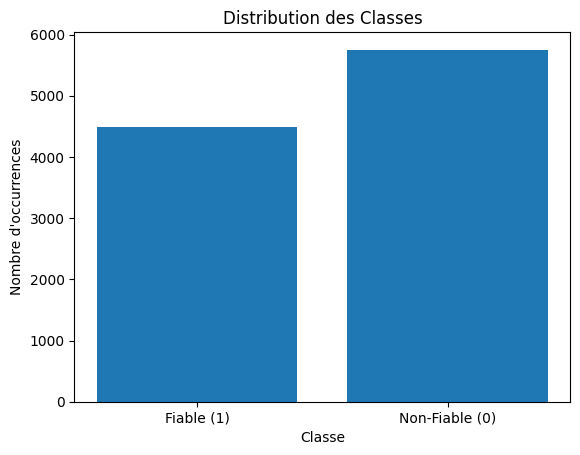

In [ ]:
import matplotlib.pyplot as plt


#Compter les occurrences de chaque classe
class_counts = y.value_counts()

#diagramme distribution des classes
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des Classes')
#Ajustement  des labels selon vos classes
plt.xticks(class_counts.index, ['Non-Fiable (0)', 'Fiable (1)'])
plt.show()



 L'analyse de l'ensemble de données révèle une répartition déséquilibrée entre les instances "Fiables" (4500) et "Non-Fiables" (5700), indiquant une prédominance modérée de la classe "Non-Fiable". Bien que ce déséquilibre ne soit pas énorme, il a le potentiel d'affecter négativement l'efficacité du modèles en inclinant la prédiction vers la classe majoritaire. J'adopterai une  stratégies de rééquilibrage des classes pour améliorer la fiabilité et la justesse des prédictions du modèle.

**Rééquilibrage des Classes**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#préparation des données
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

#division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#application de SMOTE sur l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




**utilisation des prédictions et des vraies étiquettes pour calculer et afficher le rapport de classification**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.43      0.48       888
           1       0.63      0.73      0.68      1160

    accuracy                           0.60      2048
   macro avg       0.59      0.58      0.58      2048
weighted avg       0.59      0.60      0.59      2048




Le modèle montre une meilleure performance sur les instances "Fiables" avec une précision de 63% et un rappel de 73%, comparé aux "Non-Fiables" (précision de 55%, rappel de 43%), indiquant une capacité plus élevée à identifier correctement les affirmations fiables. L'accuracy globale est de 60%, soulignant un besoin d'amélioration dans la classification des informations non-fiables et la généralisation du modèle.